Dec 2016
<img width=300 src="./fig/ladisk.png">

<center>[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

Najprej $fr$ tako, da bo celi večkratnih in brez šuma, potem pa ne! Nato dodaj okno.

In [2]:
T = 1.5
N = 1000
fr = 15.5/T
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*fr*t)
#x[np.logical_or(-w*T*0.25>t,t>w*T*0.25)]=0.
x = x+1.*(np.random.rand(N)-0.5)
w = np.hanning(len(x))
x=w*x

# Digitalna kvantizacija

In [3]:
dig=12;
x2=np.round((2**(dig-1))*x)/(2**(dig-1))

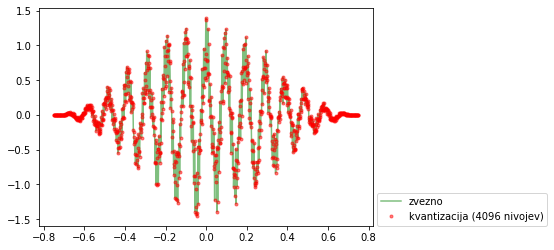

In [4]:
plt.plot(t, x, 'g', label='zvezno', alpha=0.5)
plt.plot(t, x2, 'r.', label='kvantizacija ({} nivojev)'.format(2**dig), alpha=0.5)
plt.legend(loc=(1.01, 0));

In [5]:
N_ = N
N_ = np.sum(w) # v primeru okna
X1=2*np.fft.rfft(x)/N_
X2=2*np.fft.rfft(x2)/N_

f1=np.fft.rfftfreq(len(x),dt)

Amplitudni spekter

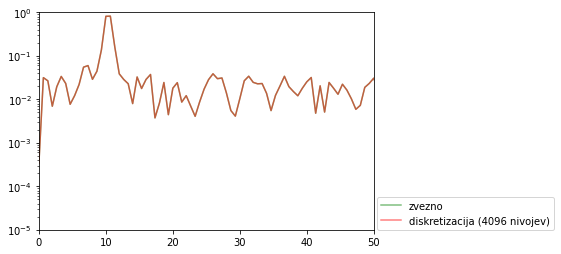

In [6]:
plt.semilogy(f1, np.abs(X1), 'g', label='zvezno', alpha=0.5)
plt.semilogy(f1, np.abs(X2), 'r', label='diskretizacija ({} nivojev)'.format(2**dig), alpha=0.5)
plt.ylim(1e-5, 1.)
plt.xlim(0, 50)
plt.legend(loc=(1.01, 0));

# SNR - signal to noise ratio

Definicija:

$SNR=10\log_{10}\frac{\sigma_{s}^2}{\sigma_{n}^2}=20\log_{10}\frac{\sigma_{s}}{\sigma_{n}}$

$\sigma_{s}$ - standardna deviacija signala

$\sigma_{n}$ - standardna deviacija šuma (noise)

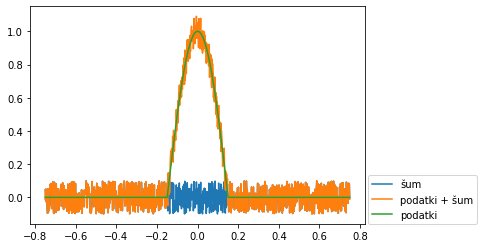

In [7]:
T = 1.5
N = 1000
w = 0.4
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t/(w*T))
x[np.logical_or(-w*T*0.25 > t , t > w*T*0.25)] = 0.
n = 0.2*(np.random.rand(N)-0.5)
plt.plot(t, n, label='šum')
plt.plot(t, x+n, label='podatki + šum')
plt.plot(t, x, label='podatki')
plt.legend(loc=(1.01, 0));

In [8]:
def SNR(A1, A0):
    return 10*np.log10(A1**2/A0**2)

In [9]:
SNR(.1,1.)

-20.0

In [10]:
SNR(np.std(x), np.std(n))

13.827294662519432

# Vzorčenje

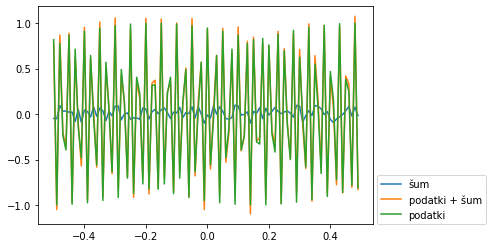

In [11]:
T = 1.
N = 100
f = 60.3
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*f*np.pi*t+0.33)
n = 0.2*(np.random.rand(len(t))-0.5)
plt.plot(t, n, label='šum')
plt.plot(t, x+n, label='podatki + šum')
plt.plot(t, x, label='podatki')
plt.legend(loc=(1.01, 0));

Frekvenca vzorčenja

In [12]:
fs=1/dt
fs/2

49.99999999999996

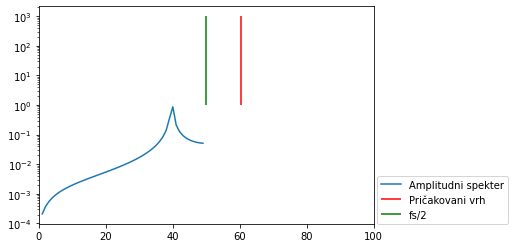

In [13]:
X1=np.fft.fft(x)*2/len(x)

f1=np.fft.fftfreq(len(x),dt)
plt.semilogy(f1[f1>0], np.abs(X1[f1>0]), label='Amplitudni spekter');
plt.vlines(f, 1, 1000, 'r', label='Pričakovani vrh')
plt.vlines(fs/2, 1, 1000, 'g', label='fs/2')
plt.xlim(0, fs/2+50)
plt.legend(loc=(1.01, 0));